In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


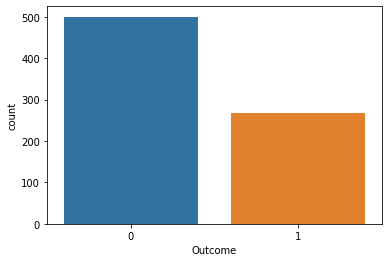

In [ ]:
sns.countplot(x='Outcome',data=df)

In [ ]:
df[df==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
#To replace zeros with np.nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [ ]:
#Total Nan count
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#To fill nan data for outcome is zero with median(i.e, non diabetic)
df[df['Outcome']==0].median()

Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
dtype: float64

In [ ]:
#To fill nan data for outcome with 1 with median(i.e, diabetic)
df[df['Outcome']==1].median()

Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


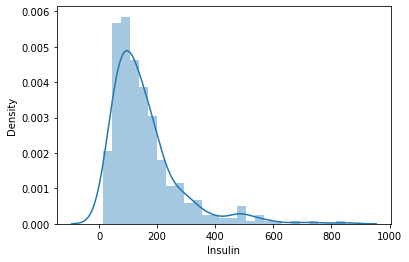

In [ ]:
sns.distplot(df['Insulin'])

In [ ]:
df.loc[(df['Outcome'] == 0) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


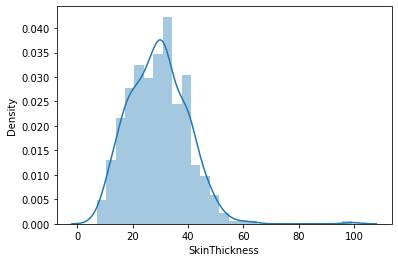

In [ ]:
sns.distplot(df['SkinThickness'])

In [ ]:
df.loc[(df['Outcome'] == 0) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
df.loc[(df['Outcome'] == 1) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


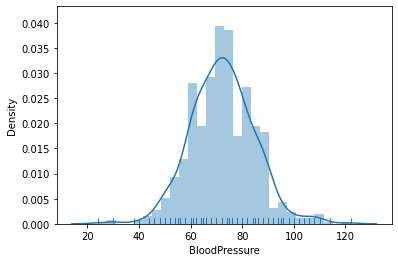

In [ ]:
sns.distplot(df['BloodPressure'],rug=True)

In [ ]:
df.loc[(df['Outcome'] == 0) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
df.loc[(df['Outcome'] == 1) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.0

In [ ]:
df.loc[(df['Outcome'] == 0) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [ ]:
df.loc[(df['Outcome'] == 0) & (df['Glucose'].isnull()) , 'Glucose'] = 107.0
df.loc[(df['Outcome'] == 1) & (df['Glucose'].isnull()) , 'Glucose'] = 140.0

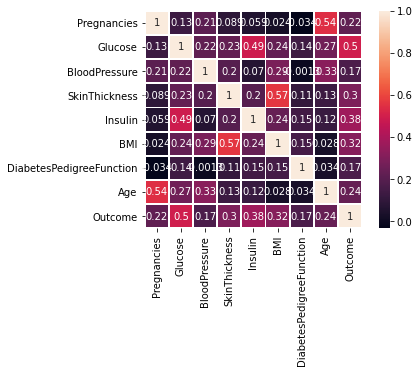

In [ ]:
#Finding correlation
crr=df.corr()
sns.heatmap(crr,annot=True,square=True,linewidths=1)

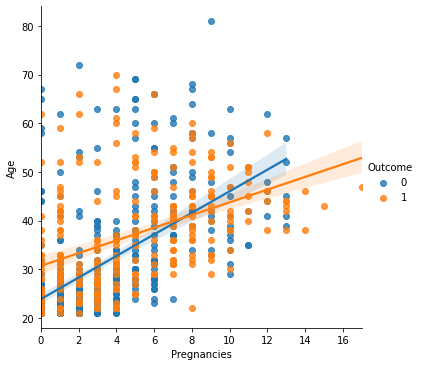

In [ ]:
#The correlation is high between (Pregancies,age), (Glucose, Insulin), (Glucose, Outcome), (SkinThinkness,BMI)
sns.lmplot(x='Pregnancies',y='Age',data=df,hue='Outcome')

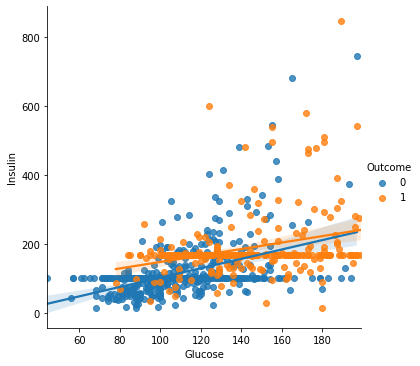

In [ ]:
sns.lmplot(x='Glucose',y='Insulin',data=df,hue='Outcome')

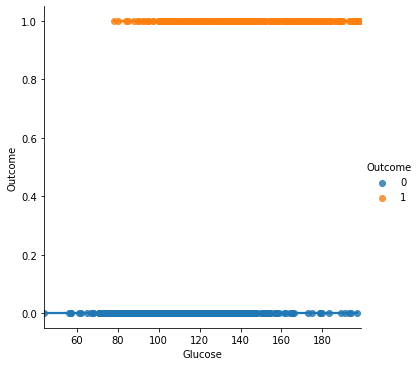

In [ ]:
sns.lmplot(x='Glucose',y='Outcome',data=df,hue='Outcome')

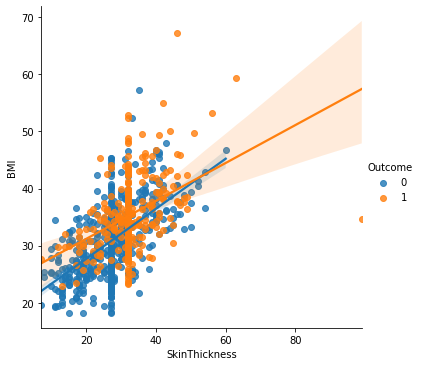

In [ ]:
sns.lmplot(x='SkinThickness',y='BMI',data=df,hue='Outcome')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)

In [ ]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000,validation_data=(X_test,y_test))

Epoch 1/1000
62/62 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.6417 - val_loss: 0.6823 - val_accuracy: 0.6948
Epoch 2/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6401 - val_loss: 0.6389 - val_accuracy: 0.6948
Epoch 3/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6417 - val_loss: 0.5379 - val_accuracy: 0.7338
Epoch 4/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7085 - val_loss: 0.4537 - val_accuracy: 0.7987
Epoch 5/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7752 - val_loss: 0.4089 - val_accuracy: 0.8247
Epoch 6/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7850 - val_loss: 0.3850 - val_accuracy: 0.8442
Epoch 7/1000
62/62 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.7834 - val_loss: 0.3683 - val_accuracy: 0.8506
Epoch 

In [ ]:
# y_pred = classifier.predict(X_test)

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

In [ ]:
t=classifier.predict(sc.transform(np.array([[8,179,72,42,130,32.7,0.719,36]])))
t.round()

array([[1.]], dtype=float32)

In [ ]:
classifier.save('mymodel.h5')

array([[0]])

In [ ]:
df['Glucose'].min()

0